# Klasifikasi Pekerjaan berdasarkan Resume(Curriculum Vitae) menggunakan SVM(Support Vector Machine)


## Tentang Project
Perusahaan sering menerima ribuan resume atau CV untuk setiap lowongan pekerjaan dan mempekerjakan petugas penyaringan khusus untuk menyaring kandidat yang memenuhi syarat.

Mempekerjakan talenta yang tepat merupakan tantangan bagi semua bisnis. Tantangan ini diperbesar oleh tingginya volume pelamar jika bisnis tersebut padat karya, dan berkembang.

Departemen TI kekurangan pasar yang berkembang. Dalam organisasi layanan tipikal, para profesional dengan berbagai keterampilan teknis dan keahlian domain bisnis dipekerjakan dan ditugaskan ke proyek untuk menyelesaikan masalah pelanggan. Tugas memilih talenta terbaik di antara banyak lainnya ini dikenal sebagai **Resume Screening**.

Biasanya, perusahaan besar tidak memiliki cukup waktu untuk membuka setiap CV, sehingga mereka menggunakan algoritma pembelajaran mesin untuk tugas Penyaringan Resume.

Selain dari sisi perusahaan, dari sisi pelamar pun terkadang memiliki kebingungan dengan posisi kerja yang akan dilamar. Hal ini terjadi karena disaat ini, banyak jenis pekerjaan dengan nama yang beragam. Bahkan antara satu perusahaan dengan perusahaan lain memiliki penamaan berbeda terhadap suatu posisi yang memiliki *job desk* sama.

Juga untuk mahasiswa *freshgraduate* yang belum pernah atau belum tau tentang dunia kerja tidak mengerti tentang istilah posisi serta kecocokannya dengan suatu posisi. Ini tidaklah mengherankan, karena kebanyakan pelamar freshgraduate hanya mengetahui posisi - posisi *mainstream* seperti Project Manager, Software Engineer, dan lainnya, tapi minim informasi tentang posisi yang kurang *mainstream* seperti Social Media Strategist, SEO Specialist, Quality Assurance yang kemungkinan cocok dengan kualifikasi pelamar.

## Tujuan Project
- Memudahkan perusahaan dalam melakukan Resume Screaning
  - Menyaring pelamar yang cocok dengan posisi yang ditawarkan
  - Mempersingkat waktu selama proses perekrutan
  - Mempersempit kandidat untuk posisi yang ditawarkan
- Memudahkan pelamar pekerjaan yang bingung dengan posisi yang cocok dengan kualifikasinya
  - Memberikan rekomendasi posisi pekerjaan yang cocok dengan CV pelamar
  - Mempersempit area pekerjaan agar pelamar bisa fokus untuk suatu bidang pekerjaan

## Code
### Import module

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from pandas.plotting import scatter_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

### Dataset
Sumber dataset: [Kaggle](https://www.kaggle.com/gauravduttakiit/resume-screening-using-machine-learning/data)
<br>
Pertama, kita baca dataset, kemudian menampilkannya dalam bentuk tabel, untuk mengetahui struktur data yang digunakan. Dan juga, kita perlu menambahkan sebuah tabel baru, yaitu *cleaned_resume* yang nantinya akan kita isikan dengan teks resume yang sudah bersih, tanpa ada karakter - karakter yang tidak diperlukan oleh komputer untuk dipelajari.

In [2]:
resumeDataSet = pd.read_csv('UpdatedResumeDataSet.csv' ,encoding='utf-8')
resumeDataSet['cleaned_resume'] = ''
resumeDataSet.head()

,Category,Resume,cleaned_resume
0,Data Science,Skills * Programming Languages: Python (pandas...,
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",


Dari tabel di atas, diketahui bahwa data terdiri dari Category dan Resume. Category merupakan jenis pekerjaan, dan Resume merupakan isi dari resume atau CV. Namun sayangnya, tabel di atas tidak mendeskripsikan data secara keseluruhan. Sekarang, kita perlu mengetahui berapa banyak data yang digunakan dan beberapa info lainnya.

In [3]:
resumeDataSet.describe()

,Category,Resume,cleaned_resume
count,962,962,962
unique,25,166,1
top,Java Developer,"Technical Skills Web Technologies: Angular JS,...",
freq,84,18,962


Tabel di atas mendeskripsikan bagaimana dataset yang kita gunakan. Terdapat 25 pekerjaan, dan 962 data.

Sebelum melakuka preprocessing, alangkah baiknya kita mengetahui bagaimana bentuk data. Sekarang, kita cek apa saja jenis pekerjaan yang ada di dalam data set.

In [4]:
print ("Displaying the distinct categories of resume -")
print (resumeDataSet['Category'].unique())

Displaying the distinct categories of resume -
['Data Science' 'HR' 'Advocate' 'Arts' 'Web Designing'
 'Mechanical Engineer' 'Sales' 'Health and fitness' 'Civil Engineer'
 'Java Developer' 'Business Analyst' 'SAP Developer' 'Automation Testing'
 'Electrical Engineering' 'Operations Manager' 'Python Developer'
 'DevOps Engineer' 'Network Security Engineer' 'PMO' 'Database' 'Hadoop'
 'ETL Developer' 'DotNet Developer' 'Blockchain' 'Testing']


Selain jenis pekerjaan, juga akan lebih baik agar kita tahu bagaimana distribusi data. Maka akan kita cetak banyak orang dari masing - masing jenis pekerjaan.

In [5]:
print ("Displaying the distinct categories of resume and the number of records belonging to each category -")
print (resumeDataSet['Category'].value_counts())

Displaying the distinct categories of resume and the number of records belonging to each category -
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Mechanical Engineer          40
Operations Manager           40
Sales                        40
Data Science                 40
ETL Developer                40
Blockchain                   40
Arts                         36
Database                     33
Health and fitness           30
PMO                          30
Electrical Engineering       30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: Category, dtype: int64


Data numerical di atas sepertinya agak sedikit susah untuk dicerna. Sekarang kita lakukan visualisasi distribusi data.

<AxesSubplot:xlabel='count', ylabel='Category'>

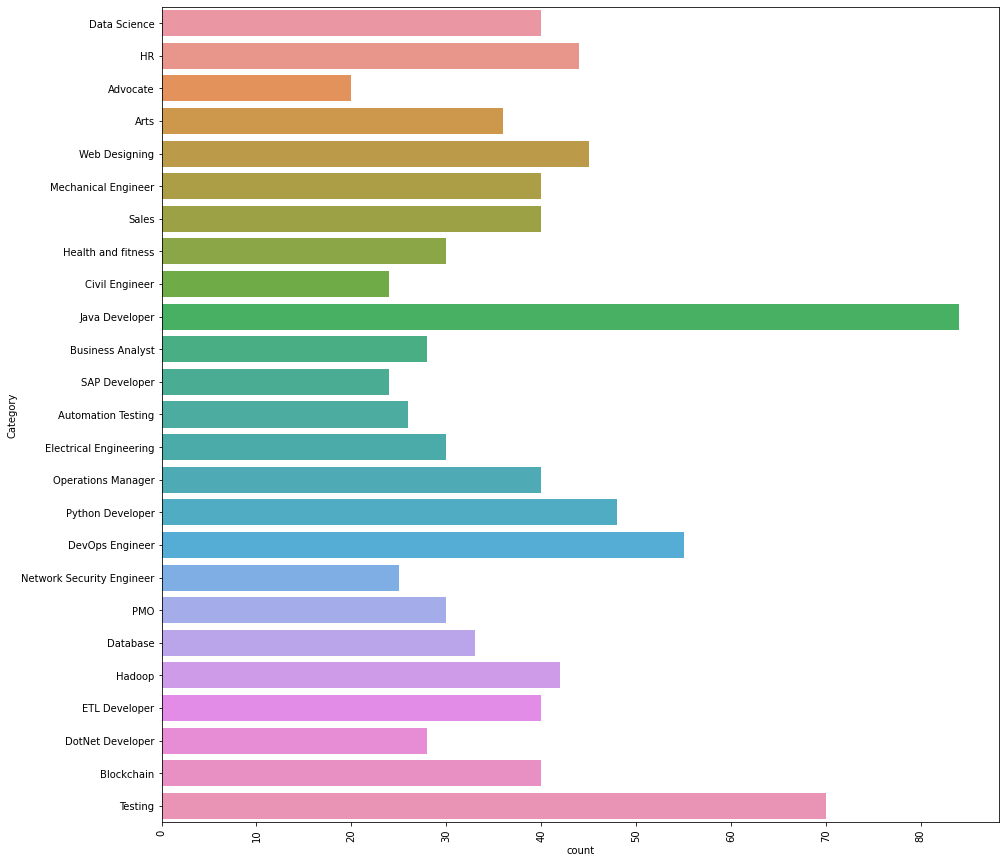

In [6]:
import seaborn as sns
plt.figure(figsize=(15,15))
plt.xticks(rotation=90)
sns.countplot(y="Category", data=resumeDataSet)

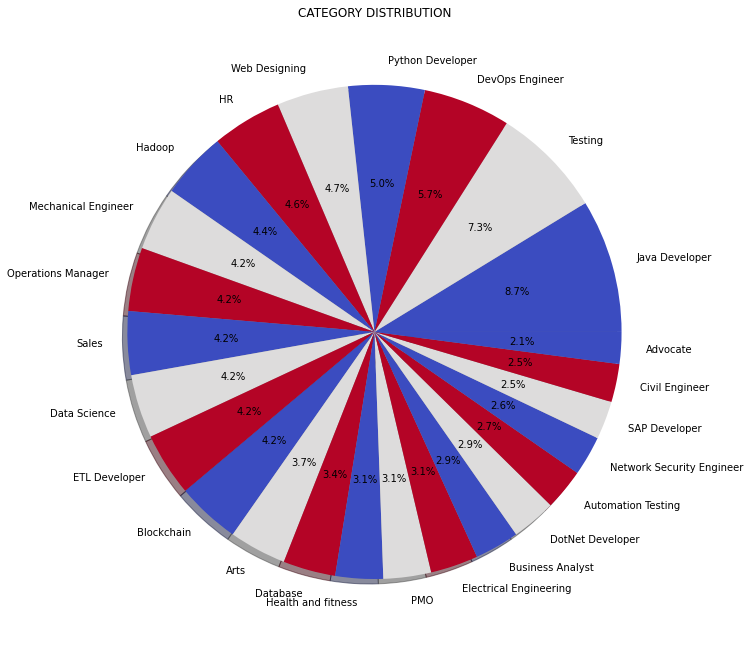

In [7]:
from matplotlib.gridspec import GridSpec
targetCounts = resumeDataSet['Category'].value_counts()
targetLabels  = targetCounts.index.tolist()
# Make square figures and axes
plt.figure(1, figsize=(25,25))
the_grid = GridSpec(2, 2)


cmap = plt.get_cmap('coolwarm')
colors = [cmap(i) for i in np.linspace(0, 1, 3)]
plt.subplot(the_grid[0, 1], aspect=1, title='CATEGORY DISTRIBUTION')

source_pie = plt.pie(targetCounts, labels=targetLabels, autopct='%1.1f%%', shadow=True, colors=colors)
plt.show()

## Preprocessing
Pertama, mari kita lihat salah satu isi resume. Agar kita tahu apa saja yang harus kita proses dari data yang kita gunakan ini.

In [8]:
print (resumeDataSet['Resume'][152])

Technical Skills Web Technologies: Angular JS, HTML5, CSS3, SASS, Bootstrap, Jquery, Javascript. Software: Brackets, Visual Studio, Photoshop, Visual Studio Code Education Details 
January 2015 B.E CSE Nagpur, Maharashtra G.H.Raisoni College of Engineering
October 2009  Photography Competition Click Nagpur, Maharashtra Maharashtra State Board
    College Magazine OCEAN
Web Designer 

Web Designer - Trust Systems and Software
Skill Details 
PHOTOSHOP- Exprience - 28 months
BOOTSTRAP- Exprience - 6 months
HTML5- Exprience - 6 months
JAVASCRIPT- Exprience - 6 months
CSS3- Exprience - Less than 1 year months
Angular 4- Exprience - Less than 1 year monthsCompany Details 
company - Trust Systems and Software
description - Projects worked on:
1. TrustBank-CBS
Project Description: TrustBank-CBS is a core banking solution by Trust Systems.
Roles and Responsibility:
â Renovated complete UI to make it more modern, user-friendly, maintainable and optimised for bank use.
â Shared the UI structu

Ternyata, data yang kita gunakan masih sangat kotor. Terdapat banyak karakter - karakter yang tidak jelas, yang akan berakibat fatal terhadap proses training. Maka dari itu, haruslah dilakukan pembersihan data dari karakter - karakter yang tidak jelas dan yang tidak dibutuhkan oleh mesin untuk dipelajari.

In [9]:
import re
def cleanResume(resumeText):
    resumeText = re.sub('http\S+\s*', ' ', resumeText)  # remove URLs
    resumeText = re.sub('\bRT\b|\bcc\b', ' ', resumeText)  # remove RT and cc
    resumeText = re.sub('#\S+', '', resumeText)  # remove hashtags
    resumeText = re.sub('@\S+', '  ', resumeText)  # remove mentions
    resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', resumeText)  # remove punctuations
    resumeText = re.sub(r'[^\x00-\x7f]',r' ', resumeText) 
    resumeText = re.sub('\s+', ' ', resumeText)  # remove extra whitespace
    return resumeText

In [10]:
resumeDataSet['cleaned_resume'] = resumeDataSet.Resume.apply(lambda x: cleanResume(x))
print (resumeDataSet['cleaned_resume'][152])

Technical Skills Web Technologies Angular JS HTML5 CSS3 SASS Bootstrap Jquery Javascript Software Brackets Visual Studio Photoshop Visual Studio Code Education Details January 2015 B E CSE Nagpur Maharashtra G H Raisoni College of Engineering October 2009 Photography Competition Click Nagpur Maharashtra Maharashtra State Board College Magazine OCEAN Web Designer Web Designer Trust Systems and Software Skill Details PHOTOSHOP Exprience 28 months BOOTSTRAP Exprience 6 months HTML5 Exprience 6 months JAVASCRIPT Exprience 6 months CSS3 Exprience Less than 1 year months Angular 4 Exprience Less than 1 year monthsCompany Details company Trust Systems and Software description Projects worked on 1 TrustBank CBS Project Description TrustBank CBS is a core banking solution by Trust Systems Roles and Responsibility Renovated complete UI to make it more modern user friendly maintainable and optimised for bank use Shared the UI structure and guidelines to be incorporated with development team of ar

### Menghapus stopword
Setelah melakukan pembersihan data di atas, sekarang data kita menjadi lebih bersih. Tidak ada lagi karakter - karakter yang tidak dikenal, dan tidak dibutuhkan oleh komputer untuk dipelajari.

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


[('Details', 484), ('Exprience', 446), ('months', 376), ('company', 330), ('description', 310), ('1', 290), ('year', 232), ('January', 216), ('Less', 204), ('Data', 200), ('data', 192), ('Skill', 166), ('Maharashtra', 166), ('6', 164), ('Python', 156), ('Science', 154), ('I', 146), ('Education', 142), ('College', 140), ('The', 126), ('project', 126), ('like', 126), ('Project', 124), ('Learning', 116), ('India', 114), ('Machine', 112), ('University', 112), ('Web', 106), ('using', 104), ('monthsCompany', 102), ('B', 98), ('C', 98), ('SQL', 96), ('time', 92), ('learning', 90), ('Mumbai', 90), ('Pune', 90), ('Arts', 90), ('application', 84), ('Engineering', 78), ('24', 76), ('various', 76), ('Software', 76), ('Responsibilities', 76), ('Nagpur', 76), ('development', 74), ('Management', 74), ('projects', 74), ('Technologies', 72), ('Used', 72)]


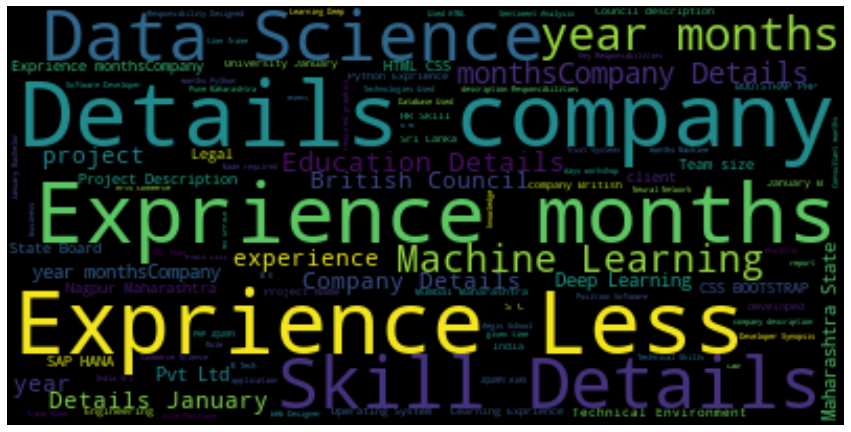

In [11]:
import nltk
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud

# Download stopwords from nltk
nltk.download('stopwords')

# Download punktuations from nltk
nltk.download('punkt')

oneSetOfStopWords = set(stopwords.words('english')+['``',"''"])
totalWords =[]
Sentences = resumeDataSet['Resume'].values
cleanedSentences = ""
for i in range(0,160):
    cleanedText = cleanResume(Sentences[i])
    cleanedSentences += cleanedText
    requiredWords = nltk.word_tokenize(cleanedText)
    for word in requiredWords:
        if word not in oneSetOfStopWords and word not in string.punctuation:
            totalWords.append(word)
    
wordfreqdist = nltk.FreqDist(totalWords)
mostcommon = wordfreqdist.most_common(50)
print(mostcommon)

wc = WordCloud().generate(cleanedSentences)
plt.figure(figsize=(15,15))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

### Mengubah kategori menjadi numerical data
Selanjutnya, kita harus mengubah kategori yang merupakan tekstual data menjadi numerical data. Karena pada dasarnya, data dalam bentuk tekstual tidak dapat dipelajari oleh mesin.

In [12]:
from sklearn.preprocessing import LabelEncoder

var_mod = ['Category']
le = LabelEncoder()
for i in var_mod:
    resumeDataSet[i] = le.fit_transform(resumeDataSet[i])
print ("CONVERTED THE CATEGORICAL VARIABLES INTO NUMERICALS")
resumeDataSet.head(5)

CONVERTED THE CATEGORICAL VARIABLES INTO NUMERICALS


,Category,Resume,cleaned_resume
0,6,Skills * Programming Languages: Python (pandas...,Skills Programming Languages Python pandas num...
1,6,Education Details \r\nMay 2013 to May 2017 B.E...,Education Details May 2013 to May 2017 B E UIT...
2,6,"Areas of Interest Deep Learning, Control Syste...",Areas of Interest Deep Learning Control System...
3,6,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,6,"Education Details \r\n MCA YMCAUST, Faridab...",Education Details MCA YMCAUST Faridabad Haryan...


In [13]:
print (resumeDataSet['Category'].value_counts())

15    84
23    70
8     55
20    48
24    45
12    44
13    42
18    40
16    40
10    40
3     40
22    40
6     40
1     36
7     33
19    30
14    30
11    30
4     28
9     28
2     26
17    25
5     24
21    24
0     20
Name: Category, dtype: int64


### Vectorizing data
Seperti kita mengubah kategori menjadi numerical data di atas, sekarang kita di tahap akhir preprocessing. Yaitu vectorizing data agar isi resume dapat dimengerti oleh mesin.

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack

requiredText = resumeDataSet['cleaned_resume'].values
requiredTarget = resumeDataSet['Category'].values


word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    stop_words='english',
    max_features=1500)
word_vectorizer.fit(requiredText)
WordFeatures = word_vectorizer.transform(requiredText)

print ("Feature completed .....")

Feature completed .....


## Split data

In [15]:
X_train,X_test,y_train,y_test = train_test_split(WordFeatures,requiredTarget,random_state=0, test_size=0.2)
print(X_train.shape)
print(X_test.shape)

(769, 1500)
(193, 1500)


## Membuat model
Model kita buat menggunakan SVM dengan menggunakan kernel tipe linear(ada 3 tipe kernel yang bisa digunakan, yaitu linear, sigmoid, polynomial)

In [16]:
from sklearn import svm #support vector machine
model=OneVsRestClassifier(svm.SVC(kernel='linear',C=2))

## Train model
Sekarang, kita lakukan train model dengan label dan feature yang sudah kita bagi sebelumnya

In [17]:
model.fit(X_train,y_train)

OneVsRestClassifier(estimator=SVC(C=2, kernel='linear'))

## Test model
Setelah proses train model selesai, maka langkah terakhir adalah melakukan test, untuk menguji seberapa besar akurasi yang bisa diperoleh oleh model yang telah kita buat

In [18]:
prediction1=model.predict(X_test)
print('Accuracy for train linear SVM is {:.2f}'.format(model.score(X_train, y_train)))
print('Accuracy for test linear SVM is ',metrics.accuracy_score(prediction1,y_test))

print("\n Classification report for classifier %s:\n%s\n" % (model, metrics.classification_report(y_test, prediction1)))

Accuracy for train linear SVM is 1.00
Accuracy for test linear SVM is  1.0

 Classification report for classifier OneVsRestClassifier(estimator=SVC(C=2, kernel='linear')):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         9
           4       1.00      1.00      1.00         6
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         9
           7       1.00      1.00      1.00         7
           8       1.00      1.00      1.00        11
           9       1.00      1.00      1.00         9
          10       1.00      1.00      1.00         8
          11       1.00      1.00      1.00         9
          12       1.00      1.00      1.00         5
          13       1.00      1.00      1.00         9
          14     

Hasil dari test diatas menunjukkan bahwa tingkat akurasi dari model adalah 99.4%. 